Decision Tree

Tiatnic Survival Dataset

# 1.Import the Necessary Libraries

In [406]:
import pandas as pd
import seaborn as sns
from matplotlib import pyplot as plt
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix



# 2.Load the data sets- train and test 

In [409]:
df = pd.read_csv('train.csv')

# 3.Look at top values of train data 

In [412]:
print(df.head())

   PassengerId  Survived  Pclass  \
0            1         0       3   
1            2         1       1   
2            3         1       3   
3            4         1       1   
4            5         0       3   

                                                Name     Sex   Age  SibSp  \
0                            Braund, Mr. Owen Harris    male  22.0      1   
1  Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                             Heikkinen, Miss. Laina  female  26.0      0   
3       Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
4                           Allen, Mr. William Henry    male  35.0      0   

   Parch            Ticket     Fare Cabin Embarked  
0      0         A/5 21171   7.2500   NaN        S  
1      0          PC 17599  71.2833   C85        C  
2      0  STON/O2. 3101282   7.9250   NaN        S  
3      0            113803  53.1000  C123        S  
4      0            373450   8.0500   NaN        S  


# 4.Print the column names of train data

In [415]:
print(df.columns)

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')


# 5.Print the dimension of train data

In [418]:
print("Dimensions of train data : ",(df.shape))

Dimensions of train data :  (891, 12)


# 6.Print the number of missing values in each column of train 

In [420]:
print(df.isnull().sum())

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64


### Data Visualization

# 7.Barchart of Survived, Pclass, Sex, Embarked

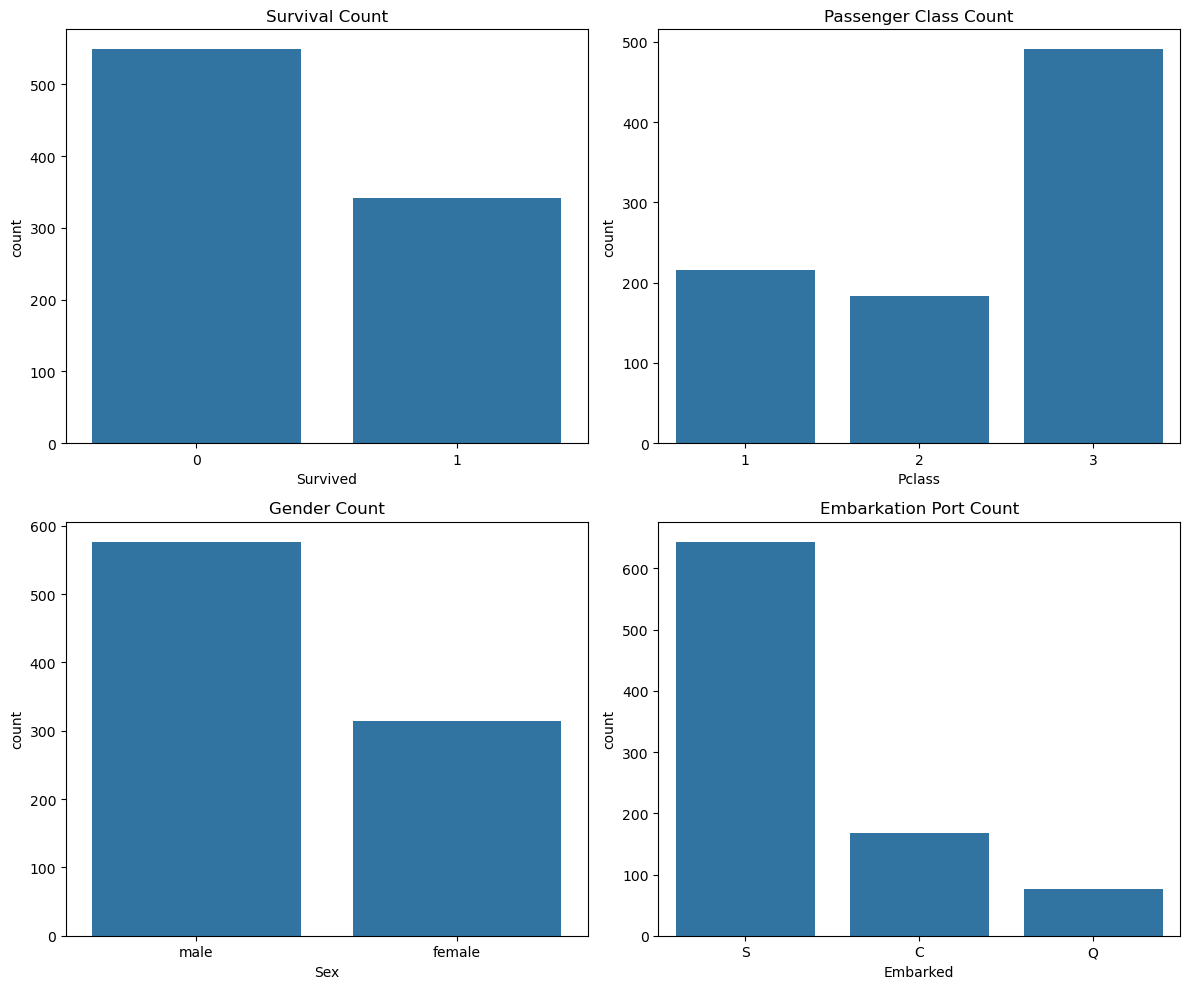

In [424]:
# Bar charts for Survived, Pclass, Sex, Embarked
fig, axes = plt.subplots(2, 2, figsize=(12, 10))
sns.countplot(x="Survived", data=df, ax=axes[0, 0])
sns.countplot(x="Pclass", data=df, ax=axes[0, 1])
sns.countplot(x="Sex", data=df, ax=axes[1, 0])
sns.countplot(x="Embarked", data=df, ax=axes[1, 1])

axes[0, 0].set_title("Survival Count")
axes[0, 1].set_title("Passenger Class Count")
axes[1, 0].set_title("Gender Count")
axes[1, 1].set_title("Embarkation Port Count")

plt.tight_layout()
plt.show()

# 8.Histogram of Age, Parch, Fare

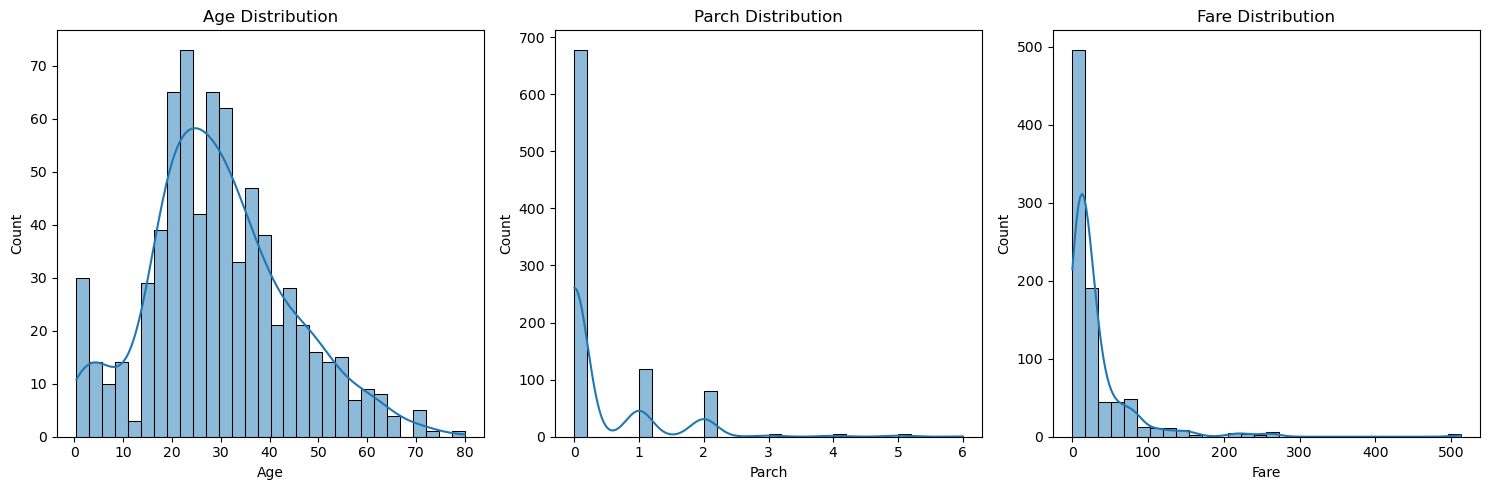

In [426]:
fig, axes = plt.subplots(1, 3, figsize=(15, 5))
sns.histplot(df["Age"].dropna(), bins=30, kde=True, ax=axes[0])
sns.histplot(df["Parch"], bins=30, kde=True, ax=axes[1])
sns.histplot(df["Fare"], bins=30, kde=True, ax=axes[2])

axes[0].set_title("Age Distribution")
axes[1].set_title("Parch Distribution")
axes[2].set_title("Fare Distribution")

plt.tight_layout()
plt.show()

# 9.Plot histogram of age for survived and did not survived class

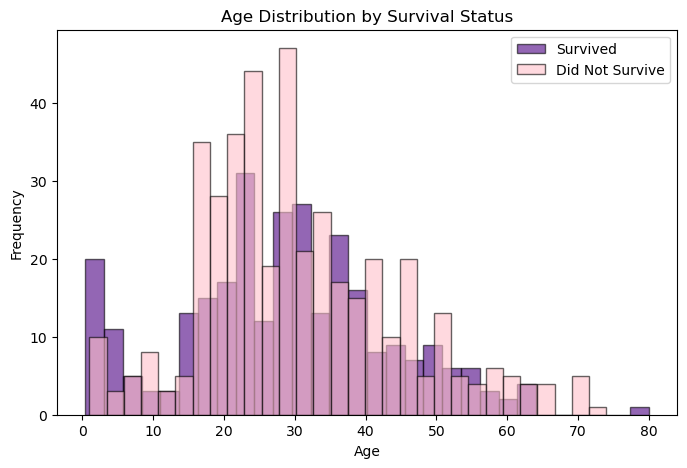

In [428]:
plt.figure(figsize=(8, 5))
plt.hist(df[df["Survived"] == 1]["Age"].dropna(), bins=30, color="indigo", alpha=0.6, label="Survived", edgecolor="black")
plt.hist(df[df["Survived"] == 0]["Age"].dropna(), bins=30, color="pink", alpha=0.6, label="Did Not Survive", edgecolor="black")
plt.legend()
plt.title("Age Distribution by Survival Status")
plt.xlabel("Age")
plt.ylabel("Frequency")
plt.show()

# 10.Count class and geder wise survival rate - plot with appropriate chart

<Figure size 1000x600 with 0 Axes>

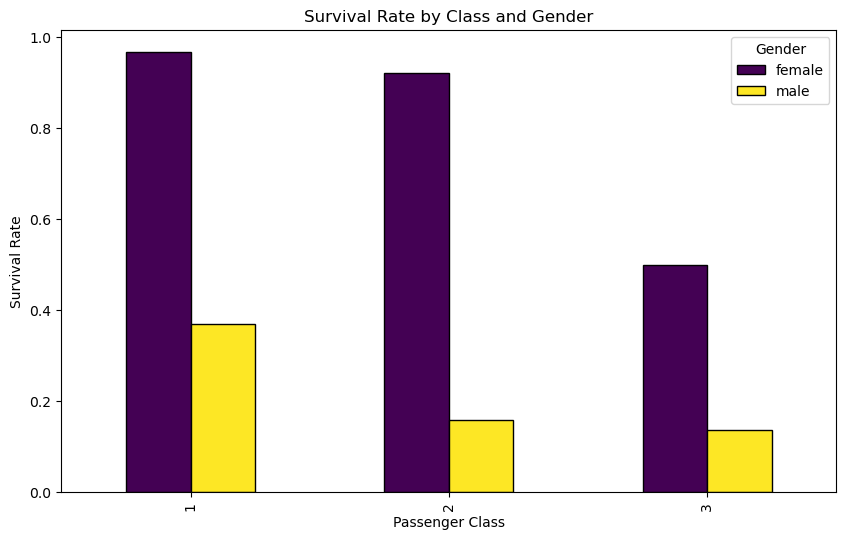

In [430]:
plt.figure(figsize=(10, 6))
survival_rates = df.groupby(["Pclass", "Sex"])["Survived"].mean().unstack()
survival_rates.plot(kind="bar", figsize=(10, 6), colormap="viridis", edgecolor="black")
plt.title("Survival Rate by Class and Gender")
plt.xlabel("Passenger Class")
plt.ylabel("Survival Rate")
plt.legend(title="Gender")
plt.show()

# 11.Age wise Distribution of Male and Female passengers

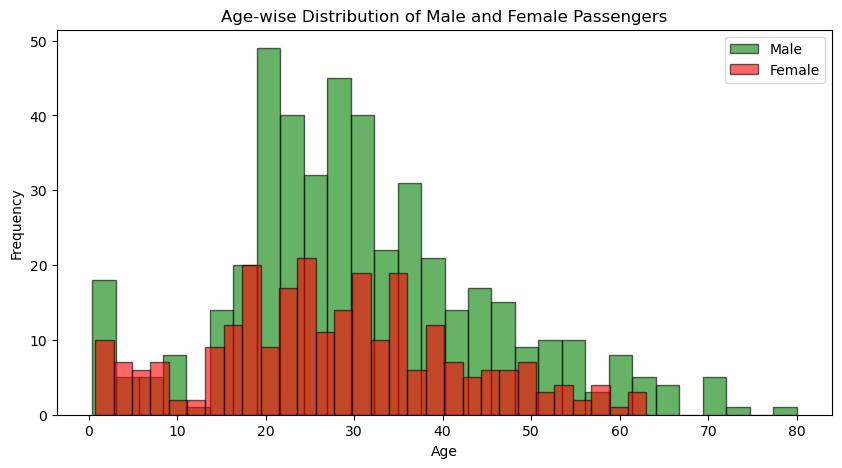

In [432]:
plt.figure(figsize=(10, 5))
plt.hist(df[df["Sex"] == "male"]["Age"].dropna(), bins=30, color="green", alpha=0.6, label="Male", edgecolor="black")
plt.hist(df[df["Sex"] == "female"]["Age"].dropna(), bins=30, color="red", alpha=0.6, label="Female", edgecolor="black")
plt.legend()
plt.title("Age-wise Distribution of Male and Female Passengers")
plt.xlabel("Age")
plt.ylabel("Frequency")
plt.show()

# 12.Histogram of Age of the given data set(sample)

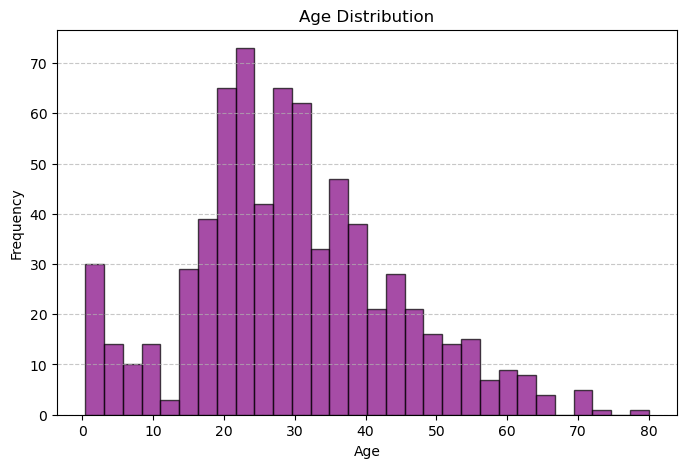

In [434]:
plt.figure(figsize=(8, 5))
plt.hist(df["Age"].dropna(), bins=30, color="purple", edgecolor="black", alpha=0.7)
plt.title("Age Distribution")
plt.xlabel("Age")
plt.ylabel("Frequency")
plt.grid(axis="y", linestyle="--", alpha=0.7)
plt.show()

### Handling Missing Values

# 13.Replace the missing values in Embarked column by 'S'


In [437]:
df["Embarked"] = df["Embarked"].fillna("S")

# 14.Impute the missing values in Fare column with median value


In [439]:
mean_age = df["Age"].mean()
std_age = df["Age"].std()
num_missing = df["Age"].isnull().sum()

# 15.Impute the Age column. It has too many missing values but it may be important. 

In [442]:
random_ages = np.random.normal(mean_age, std_age, num_missing)

# 16.We fill the missing values with numbers randomly drawn from distribution

In [444]:
df.loc[df["Age"].isnull(), "Age"] = random_ages

# 17.that has same mean and standard deviation as non missing Age data

In [446]:
print(df["Age"].isnull().sum())

0


### Feature Engineering - Creating new features

# 18.Create and add a new feature FamilySize as a combination of SibSp and Parch

In [449]:
df["FamilySize"] = df["SibSp"] + df["Parch"] + 1

# 19.FamilySize = Parch + SibSp + 1

In [451]:
df["IsAlone"] = df["FamilySize"] == 1

# 20.Create new feature IsAlone from FamilySize

In [454]:
df["IsAlone"] = df["IsAlone"].astype(int)

# 21.If FamilySize == 1 then IsAlone = True else IsAlone = False

In [456]:
print(df[["FamilySize", "IsAlone"]].head())

   FamilySize  IsAlone
0           2        0
1           2        0
2           1        1
3           2        0
4           1        1


### Create a new attribute Has_cabin using the attribue Cabin. 

# 22.if Cabin == NaN the Has_cabin = False else Has_cabin = True

In [522]:
df["Has_cabin"] = df["Cabin"].notnull().astype(int)
print(df.head())


   PassengerId  Survived  Pclass  \
0            1         0       3   
1            2         1       1   
2            3         1       3   
3            4         1       1   
4            5         0       3   

                                                Name     Sex   Age  SibSp  \
0                            Braund, Mr. Owen Harris    male  22.0      1   
1  Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                             Heikkinen, Miss. Laina  female  26.0      0   
3       Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
4                           Allen, Mr. William Henry    male  35.0      0   

   Parch            Ticket     Fare Cabin Embarked  FamilySize  IsAlone  \
0      0         A/5 21171   7.2500   NaN        S           2        0   
1      0          PC 17599  71.2833   C85        C           2        0   
2      0  STON/O2. 3101282   7.9250   NaN        S           1        1   
3      0            

# 23.Drop the columns which may not be useful in prediction of survival
# 24.Drop PassengerId, Name, Ticket, and Cabin

In [ ]:
df.drop(columns=["PassengerId", "Name", "Ticket", "Cabin"], inplace=True)

## Model Building

# 25.Prepare X and y

In [ ]:
# Define features (X) and target (y)
X = df.drop(columns=["Survived"])  # Features (all columns except target)
y = df["Survived"]  # Target variable


# 26.Label encoding of categorical features


In [ ]:
from sklearn.preprocessing import LabelEncoder

# Identify categorical columns
categorical_cols = X.select_dtypes(include=["object"]).columns

# Apply Label Encoding to categorical columns
label_encoders = {}  # Dictionary to store encoders for each column
for col in categorical_cols:
    le = LabelEncoder()
    X[col] = le.fit_transform(X[col])  # Transform the column
    label_encoders[col] = le  # Store the encoder for future reference


# 27.concat df_categorical with original df

In [ ]:
df_encoded = pd.concat([X, y], axis=1)  # Recombine features and target

# 28.Do a pairplot of all features

In [ ]:
sns.pairplot(df_encoded, hue="Survived", diag_kind="kde")
plt.show()

# 29.Splitting the data into train and validation set - 90% train 10% validation
# 30.X_train, X_test, y_train, y_validation


In [ ]:
from sklearn.model_selection import train_test_split

# Splitting the data into 90% training and 10% validation
X_train, X_validation, y_train, y_validation = train_test_split(X, y, test_size=0.1, random_state=42, stratify=y)

# Verify the shape of the datasets
print("Training Data Shape:", X_train.shape)
print("Validation Data Shape:", X_validation.shape)
print("Target Training Shape:", y_train.shape)
print("Target Validation Shape:", y_validation.shape)


# 31.Create the model

In [ ]:
# Initialize the Decision Tree model with default hyperparameters
model = DecisionTreeClassifier(random_state=42)

# 32.Fitting the decision tree with default hyperparameters

In [ ]:
# Fit the model to the training data
model.fit(X_train, y_train)


# 33.Importing decision tree classifier from sklearn library

In [ ]:
from sklearn.tree import DecisionTreeClassifier

# 34.Print the tree

In [ ]:
plt.figure(figsize=(15, 10))  # Set figure size
plot_tree(model, feature_names=X.columns, class_names=["Not Survived", "Survived"], filled=True, rounded=True)
plt.title("Decision Tree Visualization")
plt.show()

# 35.Importing required packages for visualization

In [ ]:
from sklearn.tree import plot_tree

# 36.plotting tree with max_depth=3

In [ ]:
plt.figure(figsize=(12, 8))  # Set figure size
plot_tree(model, feature_names=X.columns, class_names=["Not Survived", "Survived"], filled=True, rounded=True, max_depth=3)
plt.title("Decision Tree Visualization (max_depth=3)")
plt.show()

# 37.Check the evaluation metrics of our default model on validation set - Confusion Matrix, Accuracy, Precision, Recall, F1 score

In [514]:
# Calculate accuracy
accuracy = accuracy_score(y_validation, y_pred)

# Calculate precision, recall, and F1-score,confusion matrix
conf_matrix = confusion_matrix(y_validation, y_pred)
precision = precision_score(y_validation, y_pred)
recall = recall_score(y_validation, y_pred)
f1 = f1_score(y_validation, y_pred)

# Print the evaluation metrics
print("Confusion Matrix:\n", conf_matrix)
print(f"Accuracy: {accuracy:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"F1 Score: {f1:.4f}")


Confusion Matrix:
 [[45 10]
 [11 24]]
Accuracy: 0.7667
Precision: 0.7059
Recall: 0.6857
F1 Score: 0.6957


# 38.Importing classification report and confusion matrix from sklearn metrics

In [462]:
from sklearn.metrics import classification_report, confusion_matrix


# 39.Making predictions

In [466]:
# Predict on the validation set
y_pred = model.predict(X_validation)


# 40.Printing classification report

In [469]:
# Print classification report
print("Classification Report:\n", classification_report(y_validation, y_pred))


Classification Report:
               precision    recall  f1-score   support

           0       0.80      0.82      0.81        55
           1       0.71      0.69      0.70        35

    accuracy                           0.77        90
   macro avg       0.75      0.75      0.75        90
weighted avg       0.77      0.77      0.77        90



# 41.Printing confusion matrix and accuracy

In [472]:
# Print confusion matrix
print("Confusion Matrix:\n", confusion_matrix(y_validation, y_pred))
print(f"Accuracy: {accuracy:.4f}")

Confusion Matrix:
 [[45 10]
 [11 24]]
Accuracy: 0.7667
